In [1]:
import numpy as np
import h5py
from waveformtools.dataIO import load_SpEC_data_from_disk
from pathlib import Path
import matplotlib.pyplot as plt
import config

config.conf_matplolib()

/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/waveformtools/waveformtools
No module named 'pycbc'


In [2]:
sim = "ICTSEccParallel14"
#sim = "EccPrecDiff001"
lev ="3"

WAVDIR = Path(
    f"/mnt/pfs/vaishak.p/scripts/processed_waveforms/{sim}_waveforms_Lev{lev}/extrapolated"
)
file_name = "rhOverM_Extrapolated_N2_CoM.h5"

In [3]:
wf_modes = load_SpEC_data_from_disk(
    data_dir=WAVDIR,
    file_name=file_name,
)

Loading SpEC data.


/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/spectral/spectral
"Unable to synchronously open object (object 'Extrapolated_N4.dir' doesn't exist)" :
 Reading as SpEC file in external extrap mode
ell_max not provided.
modes array not provided. Setting ell_max from file...
Chosen ell max 8 Available ell_max 8
Using extrap order 4
Constructing the modes list
Creating modes data
Min dt 0.07333731747621641 and Max dt 0.7598708986170948
Resampling at the default timestep 0.09999834658992768
Chosen resampling fineness: auto


In [4]:
wf_modes.data_len

92092

In [8]:
(np.diff(wf_modes.time_axis)<0).any()

False

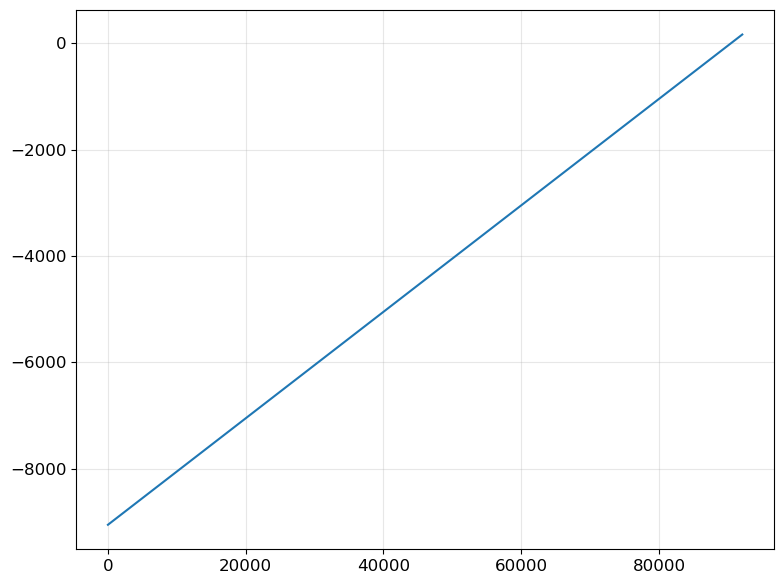

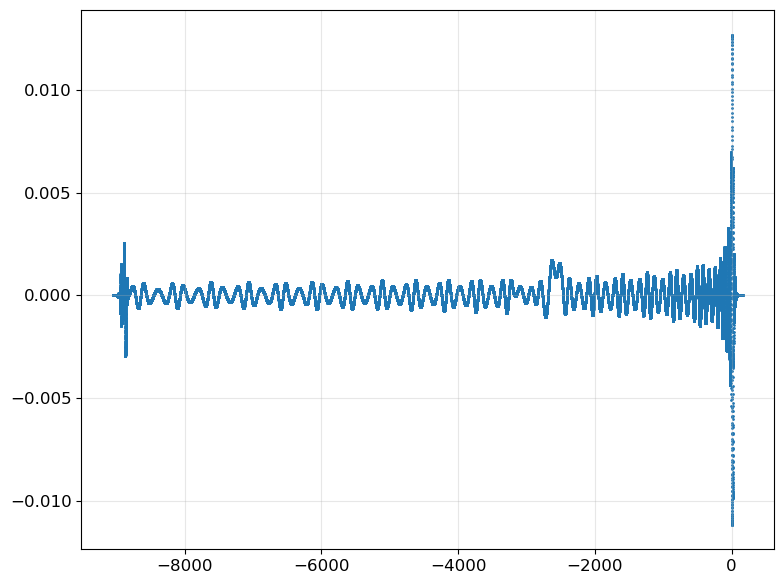

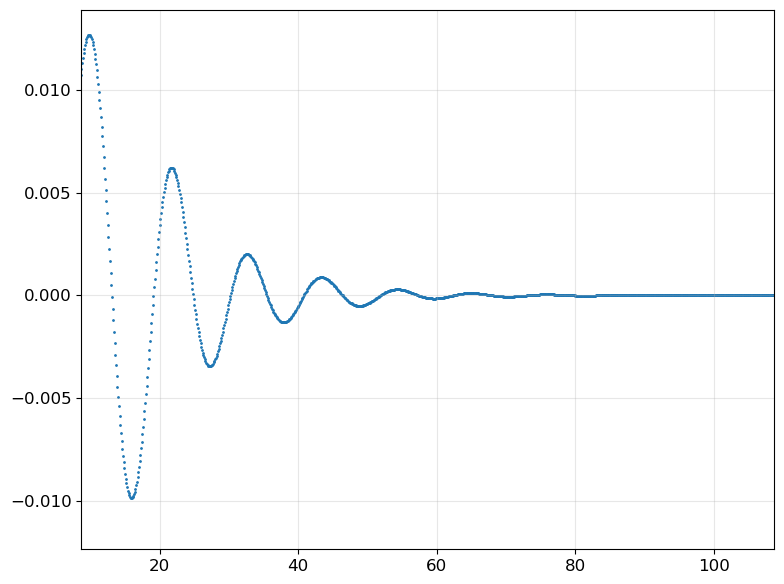

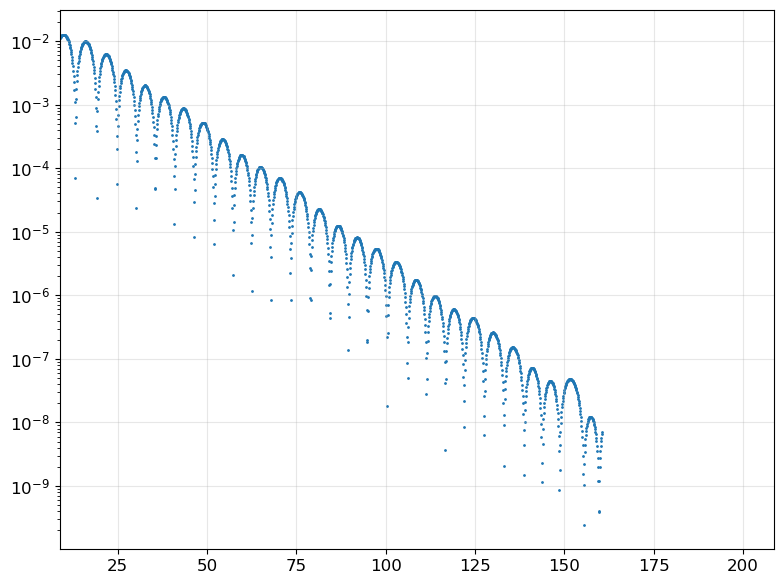

In [6]:
ell, emm = 3, 2

plt.plot(wf_modes.time_axis)
plt.show()

plt.scatter(wf_modes.time_axis, wf_modes.mode(ell, emm).real, s=1)
plt.show()

t_merger = wf_modes.time_axis[np.argmax(abs(wf_modes.mode(ell, emm)))]



plt.scatter(wf_modes.time_axis, wf_modes.mode(ell, emm).real, s=1)
plt.xlim(t_merger,t_merger+100)
plt.show()


fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(wf_modes.time_axis, abs(wf_modes.mode(ell, emm).real), s=1)
plt.xlim(t_merger,t_merger+200)
plt.show()

In [15]:
wf_modes.time_axis[0]

-9048.350391189606

In [11]:
wfile = h5py.File("/mnt/pfs/vaishak.p/scripts/processed_waveforms/ICTSEccParallel14_waveforms_Lev3/joined/ICTSEccParallel14Lev3JoinedWaveform.h5")
hfile = h5py.File("/mnt/pfs/vaishak.p/scripts/processed_waveforms/ICTSEccParallel14_waveforms_Lev3/joined/ICTSEccParallel14Lev3JoinedHorizons.h5")

In [12]:
wfile.keys()

<KeysViewHDF5 ['R0169.dir', 'R0174.dir', 'R0181.dir', 'R0188.dir', 'R0195.dir', 'R0203.dir', 'R0211.dir', 'R0221.dir', 'R0231.dir', 'R0242.dir', 'R0255.dir', 'R0268.dir', 'R0284.dir', 'R0301.dir', 'R0320.dir', 'R0342.dir', 'R0367.dir', 'R0396.dir', 'R0430.dir', 'R0470.dir', 'R0519.dir', 'R0580.dir', 'R0656.dir', 'R0755.dir', 'VersionHist.ver']>

In [7]:
hfile.keys()

<KeysViewHDF5 ['AhA.dir', 'AhB.dir', 'AhC.dir']>

In [11]:
h1 = hfile['AhA.dir']['ArealMass.dat'][...]

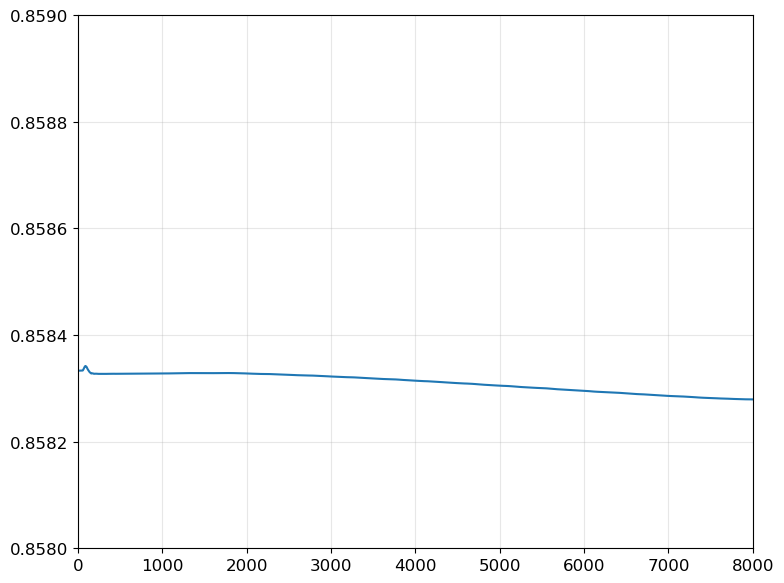

In [14]:
plt.plot(h1[:, 0], h1[:, 1])
plt.xlim(0, 8000)
plt.ylim(0.858, 0.859)
plt.show()

In [13]:
wfile['R0755.dir'].keys()

<KeysViewHDF5 ['ArealRadius.dat', 'AverageLapse.dat', 'CoordRadius.dat', 'InitialAdmEnergy.dat', 'Y_l2_m-1.dat', 'Y_l2_m-2.dat', 'Y_l2_m0.dat', 'Y_l2_m1.dat', 'Y_l2_m2.dat', 'Y_l3_m-1.dat', 'Y_l3_m-2.dat', 'Y_l3_m-3.dat', 'Y_l3_m0.dat', 'Y_l3_m1.dat', 'Y_l3_m2.dat', 'Y_l3_m3.dat', 'Y_l4_m-1.dat', 'Y_l4_m-2.dat', 'Y_l4_m-3.dat', 'Y_l4_m-4.dat', 'Y_l4_m0.dat', 'Y_l4_m1.dat', 'Y_l4_m2.dat', 'Y_l4_m3.dat', 'Y_l4_m4.dat', 'Y_l5_m-1.dat', 'Y_l5_m-2.dat', 'Y_l5_m-3.dat', 'Y_l5_m-4.dat', 'Y_l5_m-5.dat', 'Y_l5_m0.dat', 'Y_l5_m1.dat', 'Y_l5_m2.dat', 'Y_l5_m3.dat', 'Y_l5_m4.dat', 'Y_l5_m5.dat', 'Y_l6_m-1.dat', 'Y_l6_m-2.dat', 'Y_l6_m-3.dat', 'Y_l6_m-4.dat', 'Y_l6_m-5.dat', 'Y_l6_m-6.dat', 'Y_l6_m0.dat', 'Y_l6_m1.dat', 'Y_l6_m2.dat', 'Y_l6_m3.dat', 'Y_l6_m4.dat', 'Y_l6_m5.dat', 'Y_l6_m6.dat', 'Y_l7_m-1.dat', 'Y_l7_m-2.dat', 'Y_l7_m-3.dat', 'Y_l7_m-4.dat', 'Y_l7_m-5.dat', 'Y_l7_m-6.dat', 'Y_l7_m-7.dat', 'Y_l7_m0.dat', 'Y_l7_m1.dat', 'Y_l7_m2.dat', 'Y_l7_m3.dat', 'Y_l7_m4.dat', 'Y_l7_m5.dat', 'Y_l7_

In [14]:
dat = wfile['R0755.dir']['Y_l2_m2.dat'][...]
dat2 = wfile['R0755.dir']['AverageLapse.dat'][...]

In [16]:
(np.diff(dat[:, 0])<0).any()

False

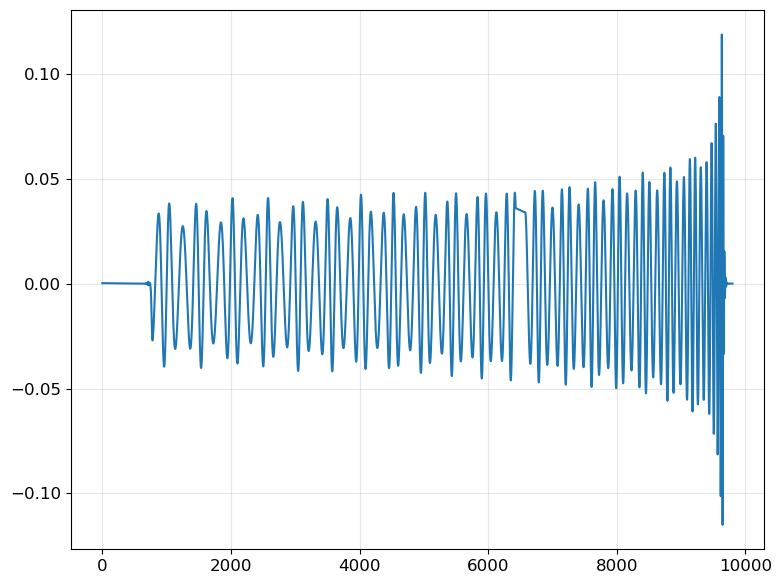

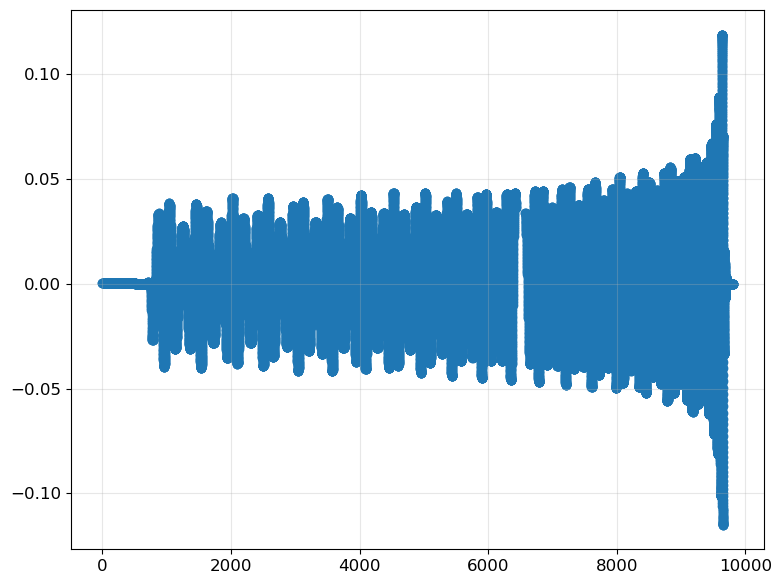

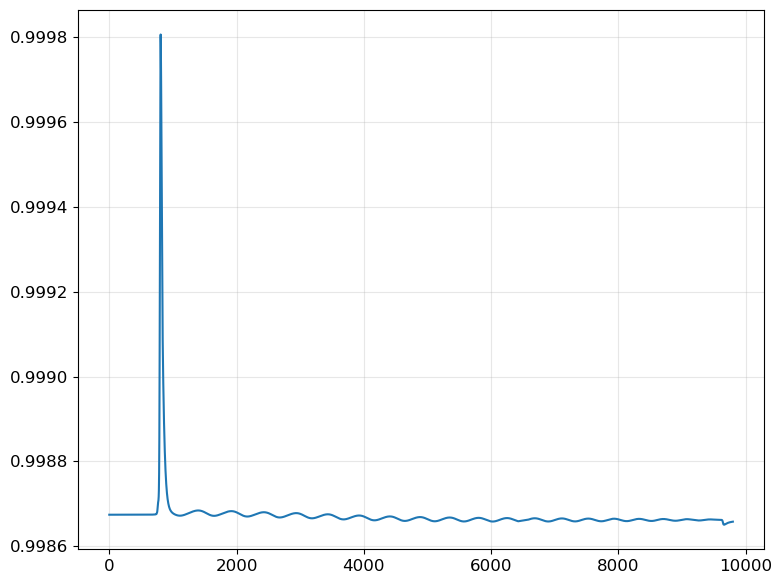

In [17]:
plt.plot(dat[:, 0], dat[:, 1])
plt.show()

plt.scatter(dat[:, 0], dat[:, 1])
plt.show()


plt.plot(dat2[:, 0], dat2[:, 1])
plt.show()